# Visualisations
Below is the code that I used to generate the final visualations that I used in the [article](https://medium.com/@willcanniford/has-captaincy-ruined-joe-root-d1a329c4f9ab) that I wrote on Medium about Root's performance as captain. I've rerun these graphs since I wrote the article, so the peak at the end of the graph represents Root's 200 against New Zealand.

In [1]:
# Required imports
import requests
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from classes.Cricketer import Cricketer

Define the 4 URLs of the 'Big 4' and their colours that will be used across all the visuals. I think this helps to tie all the graphs into a single piece. 

In [2]:
virat_kohli = 'http://stats.espncricinfo.com/ci/engine/player/253802.html?class=1;template=results;type=allround;view=innings'
steve_smith = 'http://stats.espncricinfo.com/ci/engine/player/267192.html?class=1;template=results;type=allround;view=innings'
kane_williamson = 'http://stats.espncricinfo.com/ci/engine/player/277906.html?class=1;template=results;type=allround;view=innings'
joe_root = 'http://stats.espncricinfo.com/ci/engine/player/303669.html?class=1;template=results;type=allround;view=innings'

In [3]:
root_colour = '#e74c3c'
smith_colour = '#f39c12'
kane_colour = '#2d3436'
kohli_colour = '#2980b9'

Create the `Cricketer` objects that we are going to use to calculate all the numbers which we will then plot. 

In [4]:
root = Cricketer(joe_root)
smith = Cricketer(steve_smith)
kohli = Cricketer(virat_kohli)
kane = Cricketer(kane_williamson)

## Root's rolling average

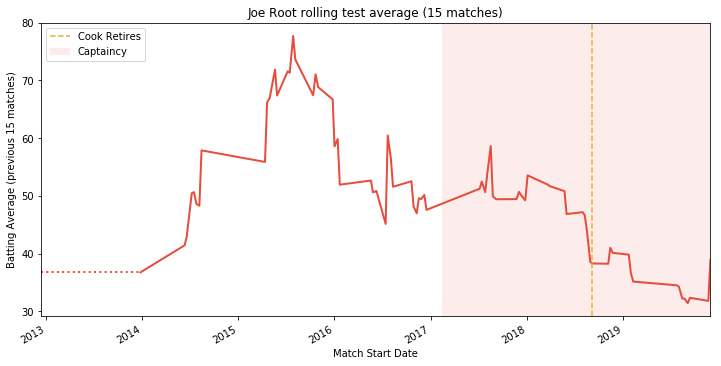

In [5]:
rolling_15_matches = root.rolling_average_matches(15)
rolling_15_matches.tail(25)

first_date = min(rolling_15_matches.index)
first_date_average = min(rolling_15_matches[rolling_15_matches.score > 0].index)
starting_average = rolling_15_matches.loc[first_date_average, 'average']
max_date = max(rolling_15_matches.index)


now = datetime.now()
captaincy_start = datetime(2017, 2, 13)

plt.figure(figsize=(12,6))
rolling_15_matches.average.plot(color=root_colour, label='_nolegend_', linewidth=2)
plt.plot([first_date, first_date_average], [starting_average, starting_average], linestyle=':', color=root_colour, label='_nolegend_', linewidth=2)
plt.title('Joe Root rolling test average (15 matches)')
plt.xlabel('Match Start Date')
plt.ylabel('Batting Average (previous 15 matches)')

# 13 February 2017
plt.axvspan(captaincy_start, now, facecolor=root_colour, alpha=0.1, label = 'Captaincy')

# 7 September 2018
cook_retires = datetime(2018, 9, 7)
plt.axvline(cook_retires, color='#e1b12c', label = 'Cook Retires', linestyle='--')
plt.legend()
plt.show()

## Root's accumulative average
__Note__: After some feedback about this graph, I reduced the line at the beginning, showing only after the first 15 innings to reduce the initial variation that happens when the sample (innings) size is small. This helped to make the graph clearer and avoid unnecessarily large y limits. 

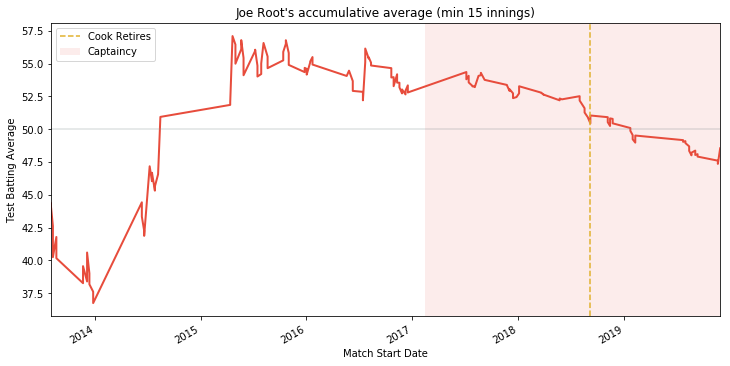

In [6]:
plt.figure(figsize=(12,6))
# Cumulative average 
innings = root.innings()[root.innings().did_bat].set_index('start_date').loc[:, ['score', 'is_out']]
innings.index = pd.to_datetime(innings.index)
innings.score = innings.score.astype('int')
rolling_innings = innings.rolling(15).sum()
rolling_innings['average'] = rolling_innings['score'] / rolling_innings['is_out']
innings['total_runs'] = innings.score.cumsum()
innings['total_dismissals'] = innings.is_out.astype('int').cumsum()
innings['running_average'] = innings.total_runs / innings.total_dismissals  #fix to allow not out first innings and avoid division by 0 error 
innings.iloc[15:].running_average.plot(color=root_colour, label='_nolegend_', linewidth=2)
plt.title('Joe Root\'s accumulative average (min 15 innings)')
plt.xlabel('Match Start Date')
plt.ylabel('Test Batting Average')
plt.axvspan(captaincy_start, now, facecolor=root_colour, alpha=0.1, label = 'Captaincy')
cook_retires = datetime(2018, 9, 7)
plt.axhline(50, color = '#7f8c8d', alpha = 0.25)
plt.axvline(cook_retires, color='#e1b12c', label = 'Cook Retires', linestyle='--')
plt.legend()
plt.show()

## Big 4 averages over time

_Same minimum innings idea was applied for the same reasons._

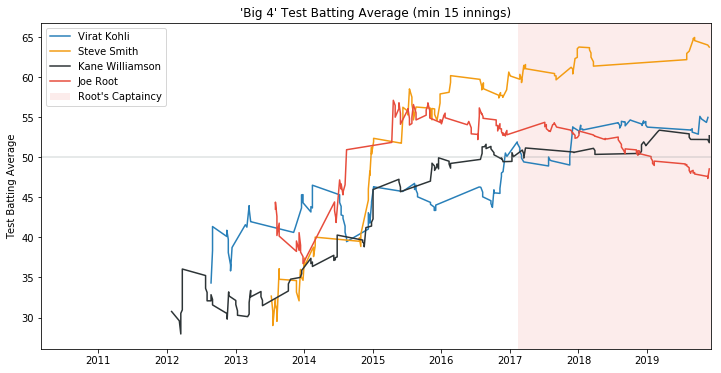

In [7]:
plt.figure(figsize=(12,6))
plt.plot(kohli.accumulative_average().iloc[15:, :].running_average, label = 'Virat Kohli', color=kohli_colour)
plt.plot(smith.accumulative_average().iloc[15:, :].running_average, label='Steve Smith', color=smith_colour)
plt.plot(kane.accumulative_average().iloc[15:, :].running_average, label='Kane Williamson', color=kane_colour)
plt.plot(root.accumulative_average().iloc[15:, :].running_average, label='Joe Root', color=root_colour)
plt.axvspan(captaincy_start, now, facecolor=root_colour, alpha=0.1, label = 'Root\'s Captaincy')
plt.legend()
start = datetime(2010, 3, 1)
plt.xlim(start, now)
plt.ylabel('Test Batting Average')
plt.axhline(50, color = '#7f8c8d', alpha = 0.25)
plt.title("'Big 4' Test Batting Average (min 15 innings)")
plt.show()

## Conversion rate
Conversion rate as grouped by calendar year here. I grouped by year as test matches are relatively rare events, and so you have to give the players enough time to play a representative number of innings. 

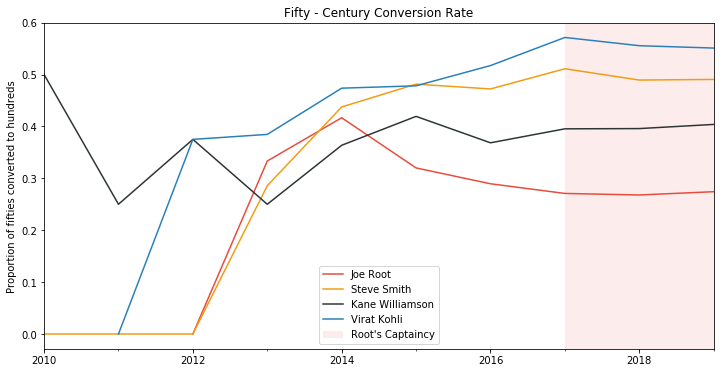

In [8]:
plt.figure(figsize=(12,6))
root.acc_yearly_conversion().rate.plot(color=root_colour, label='Joe Root')
smith.acc_yearly_conversion().rate.plot(color=smith_colour, label='Steve Smith')
kane.acc_yearly_conversion().rate.plot(color=kane_colour, label='Kane Williamson')
kohli.acc_yearly_conversion().rate.plot(color=kohli_colour, label = 'Virat Kohli')
plt.title('Fifty - Century Conversion Rate')
plt.xlabel('')
plt.ylabel('Proportion of fifties converted to hundreds')
plt.axvspan(captaincy_start, now, facecolor=root_colour, alpha=0.1, label = 'Root\'s Captaincy')
plt.legend()
plt.show()

## Milestone counts
Raw counts of milestones from the batsmen to show that Root has had plenty of opportunity but has failed to convert. 

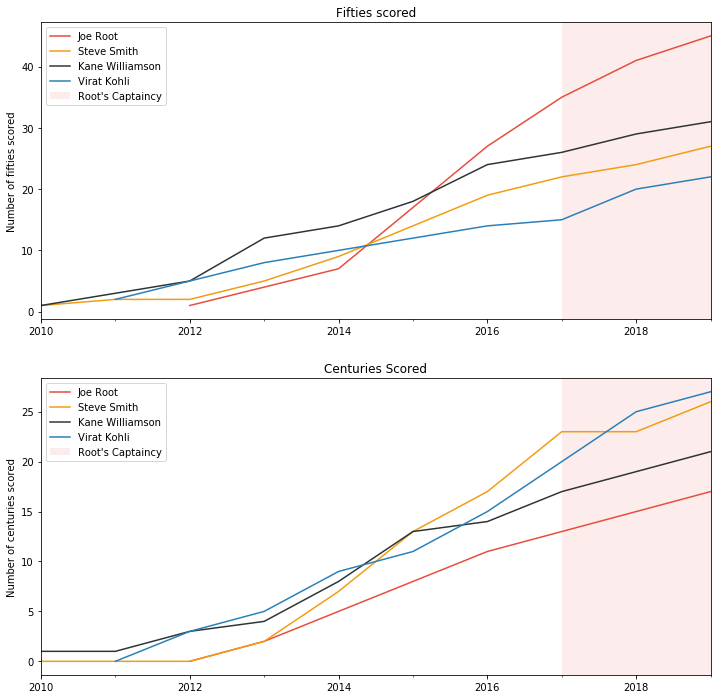

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(12,12))

plt.sca(ax[0])
root.acc_yearly_conversion().fifty.plot(color=root_colour, label='Joe Root')
smith.acc_yearly_conversion().fifty.plot(color=smith_colour, label='Steve Smith')
kane.acc_yearly_conversion().fifty.plot(color=kane_colour, label='Kane Williamson')
kohli.acc_yearly_conversion().fifty.plot(color=kohli_colour, label = 'Virat Kohli')
plt.title('Fifties scored')
plt.xlabel('')
plt.ylabel('Number of fifties scored')
plt.axvspan(captaincy_start, now, facecolor=root_colour, alpha=0.1, label = 'Root\'s Captaincy')
plt.legend()
plt.sca(ax[1])
root.acc_yearly_conversion().century.plot(color=root_colour, label='Joe Root')
smith.acc_yearly_conversion().century.plot(color=smith_colour, label='Steve Smith')
kane.acc_yearly_conversion().century.plot(color=kane_colour, label='Kane Williamson')
kohli.acc_yearly_conversion().century.plot(color=kohli_colour, label = 'Virat Kohli')
plt.title('Centuries Scored')
plt.xlabel('')
plt.ylabel('Number of centuries scored')
plt.axvspan(captaincy_start, now, facecolor=root_colour, alpha=0.1, label = 'Root\'s Captaincy')
plt.legend()
plt.show()

## Captaincy form
This required some searching to find the captaincy periods, and then they are manually defined below. I think that stacking the graphs here into a 4x1 grid allows for better comparison across the years, while the horizontal grey line at 50 marks a reference points for comparing the average value as well. 

In [10]:
smith_cap_start = datetime(2015, 11, 5) # 5 Nov 2015
smith_cap_end = datetime(2018, 3, 22) # 22 Mar 2018
smith_cap_end2 = datetime(2019, 8, 1) # 1 Aug 2019

kohli_cap_start = datetime(2015,1,1) #
kohli_cap_end = datetime.now() # Still captain

kane_cap_start = datetime(2016, 7, 28) # 28 Jul 2016
kane_cap_end = datetime.now() # Still captain

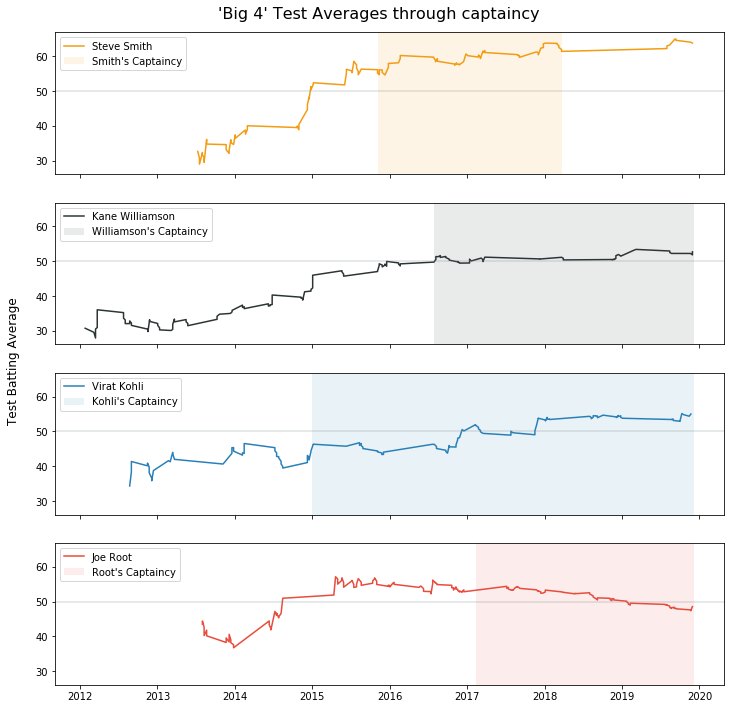

In [11]:
fig, axes = plt.subplots(4,1, figsize=(12,12), sharex=True, sharey = True)
ax = axes.flatten()

fig.suptitle("'Big 4' Test Averages through captaincy", fontsize=16, y = 0.91)
fig.text(0.07, 0.5, 'Test Batting Average', va='center', rotation='vertical', fontsize=12)

plt.sca(ax[0])
plt.plot(smith.accumulative_average().iloc[15:, :].running_average, label='Steve Smith', color=smith_colour)
plt.axhline(50, color = '#7f8c8d', alpha = 0.25)
plt.axvspan(smith_cap_start, smith_cap_end, facecolor=smith_colour, alpha=0.1, label = 'Smith\'s Captaincy') #two late 
plt.legend()

plt.sca(ax[1])
plt.plot(kane.accumulative_average().iloc[15:, :].running_average, label='Kane Williamson', color=kane_colour)
plt.axhline(50, color = '#7f8c8d', alpha = 0.25)
plt.axvspan(kane_cap_start, kane_cap_end, facecolor=kane_colour, alpha=0.1, label = "Williamson's Captaincy") #two late 
plt.legend()

plt.sca(ax[2])
plt.plot(kohli.accumulative_average().iloc[15:, :].running_average, label='Virat Kohli', color=kohli_colour)
plt.axhline(50, color = '#7f8c8d', alpha = 0.25)
plt.axvspan(kohli_cap_start, kohli_cap_end, facecolor=kohli_colour, alpha=0.1, label = 'Kohli\'s Captaincy') #two late 
plt.legend()

plt.sca(ax[3])
plt.plot(root.accumulative_average().iloc[15:, :].running_average, label='Joe Root', color=root_colour)
plt.axhline(50, color = '#7f8c8d', alpha = 0.25)
plt.axvspan(captaincy_start, now, facecolor=root_colour, alpha=0.1, label = 'Root\'s Captaincy') 
plt.legend()
plt.show()